### <font color='white'> Financial Processes Simulation Course <font>

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Logo_ITESO_normal.jpg/138px-Logo_ITESO_normal.jpg" width="138" height="240" align-text="auto" margin="auto" />


<font color = 'gray'> 

**Made by:**
[EstebanMqz](https://github.com/EstebanMqz)

**Date:** September 27, 2021.

**Repository**: https://github.com/EstebanMqz/FPS-Exam1. 
<font>
<br> <br>

<br><br><br><br><br><br><br><br><br>
#### <font color= 'lightblue'> Exam 1 <font>

Answer the following questions using at least 10000 simulations

#### 1. Tossing a Coin Game (5 points)

Entering the casino, you find that in addition to the usual games (blackjack, roulette, etc.), they offer a new interesting game with the following rules:<br>
- Each play of the game consists of repeatedly tossing a fair coin until the difference between the number of heads tossed and the number of tails **is 3**.
- If you decide to play the game, you must pay \$1$ for each toss of the coin. You cannot exit during a play of the game.
- You receive $\$8 $ at the end of each of the games.

Therefore, you win money if the number of flips required is less than 8, but you lose money if more than 8 flips are required.

##### <span style='color:lightgray'> Libraries </span><br>

In [566]:
import numpy as np
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt

#### <span style='color:lightblue'> Coin Game</span><br>

In [567]:
def coin_game(initial_cap, bet, n_tosses, prize, start):
    """Simulates a coin game where the player tries to win by tossing coins.
    The player wins if the difference between the number of heads and tails is 3,
    and loses if the difference while it is lower, counters are reset after each win.
    Parameters
    ----------
    initial_cap : int
        The initial capital of the player.
    bet : int
        The amount of money that the player bets on each coin toss.
    n_tosses : int
        The number of coin tosses.
    prize : int
        The amount of money that the player wins if the coin toss is heads.
    start : int
        The starting value of the variables.
    Returns
    -------
    capital : numpy.ndarray
        The capital of the player at each coin toss.
    """
    #Vectors of zeros for filling.
    capital = np.zeros(n_tosses) 
    heads = np.zeros(n_tosses) 
    tails = np.zeros(n_tosses)
    diff = np.zeros(n_tosses) 
    tosses = np.zeros(n_tosses)

    #Variables at game start.
    capital[0] = initial_cap 
    heads[0] = start
    tails[0] = start 
    diff[0] = start 
    tosses[0] = start

    #Working with arrays outside function: nonlocal variables.
    def fill_vector(i):
        nonlocal capital 
        nonlocal heads
        nonlocal tails
        nonlocal diff
        nonlocal tosses

        #Coin toss = Heads.
        if randrange(2) == 0: 
            heads[i+1] = heads[i] + 1 
            tails[i+1] = tails[i]     
            diff[i+1] = abs(tails [i+1] - heads [i+1] ) 
            tosses[i+1] = tosses[i] + 1 	
        else:
            #Coin toss = Tails.
            tails[i+1] = tails[i] + 1 
            heads[i+1] = heads[i] 
            diff[i+1] = abs(tails [i+1] - heads [i+1] ) 
            tosses[i+1] = tosses[i] + 1

        #Lose bet ($1): Difference in tossed coins (H & T) < 3.         
        if diff[i] < 3: 
                capital[i + 1] = capital[i] - bet

        #Win bet ($8): Difference in tossed coins (H & T) = 3.                  
        if diff[i] == 3: 
                capital[i + 1] = capital[i] + prize
                #Reset (H & T). 
                heads[i+1] = start
                tails[i+1] = start
                diff[i+1] = start
        
    #Fill variables with values.           
    [fill_vector(i) for i in range(n_tosses - 1)]

    #Make a Dataframe of resulting capital per toss. 
    capital = pd.DataFrame(capital)
    capital.columns = ['Capital']
    capital.index.name = 'Tosses'

    return capital

#### <span style='color:lightblue'> Simulation</span> 

In [568]:
def coin_game_sim(i_capital, bet, n_tosses, prize, i_tosses_counter, n_sim):
    """Creates a dataframe of n simulations of the coin game for n_tosses.
    Parameters
    ----------
    i_capital : int
        The initial capital of the player.
    bet : int
        The amount of money that the player bets per coin toss.
    n_tosses : int
        The number of coin tosses in each simulation.
    prize : int
        The amount of money that the player wins if the coin toss is heads.
    i_tosses_counter : int
        The number of tosses.
    n : int
        The number of simulations.
    Returns
    -------
    df : pandas.DataFrame
        A dataframe of n simulations for coin games played.
    """
    #Create an array of n simulations of the coin game for n_tosses.
    simulation_arr=[coin_game(i_capital, bet, n_tosses, prize, i_tosses_counter) for i in range(n_sim)]

    #Create dataframe from simulations.
    df = pd.DataFrame([i.iloc[:,0].values for i in simulation_arr])
    #Rename columns and index.
    df.columns = [str(i) for i in range(1, n_tosses+1)]
    #Index and last column name
    df.index.name = 'Sim'
    df.rename(columns={str(n_tosses): n_tosses}, inplace=True)

    return df

#### <span style='color:lightblue'> Plots</span><br>

In [569]:
def line_plot(coin_simulation, xlabel , ylabel, n_tosses, i_capital, f_capital, n):
    """Plots a line plot of the data over time in n Monte Carlo simulations.
    Parameters
    ----------
    coin_simulation : pandas.DataFrame
        The capital of the player at each coin toss.
    xlabel : str
        The label of the x-axis.
    ylabel : str
        The label of the y-axis.
    n : int
        The number of simulations in coin_simulation.
    i_capital : int
        The initial capital of the player.
    f_capital : int
        The final capital of the player.
    Returns
    -------
    line_plot : matplotlib.pyplot
        The line plot of the capital over time in n Monte Carlo simulations.
    """
    coin_simulation 
    plt.style.use("ggplot")
    coin_simulation.plot(figsize = (12, 8), xlabel = xlabel, ylabel = ylabel, title = ("Capital over time in " + str(n)
                    + " Monte Carlo simulations of " + str(n_tosses) + " games went from " + str(i_capital)+ " to: "
                    + str(f_capital)), linewidth = 0.5)
    #Show label of the number of the plot number in the legend.
    plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), labels = [str(i) for i in range(1, n+1)])

def hist_plot(coin_simulation, xlabel , ylabel, n_tosses, n, i_capital, color):
    """Plots a hist plot of the final capital in Monte Carlo simulations.
    Parameters
    ----------
    coin_simulation : pandas.DataFrame
        The capital of the player at each coin toss.
    xlabel : str
        The label of the x-axis.
    ylabel : str
        The label of the y-axis.
    n : int
        The number of simulations in coin_simulation.
    i_capital : int
        The initial capital of the player.
    f_capital : int
        The final capital of the player.
    Returns
    -------
    line_plot : matplotlib.pyplot
        The line plot of the capital over time in n Monte Carlo simulations.
    """
    plt.style.use('ggplot')
    plt.title("Final capital after " + str(n_tosses) + " games with starting capital of " + str(i_capital)
          + " calculated with " + str(n) + " simulations (of " + str(n_tosses) + " played games each).")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.hist(coin_simulation, bins = 20, color = color, width = 5, edgecolor='black', density=True)[2]
    plt.gcf().set_size_inches(12, 8)
    
    return plt.show()

#### **Game 1:** *Simulations of 10,000 Flips for 100 coin tosses games each with $50 Capital*

1 Simulation $(n_{sim}=10000)$

In [570]:
#Simulate 10000 games of 100 coin tosses each with given variables (see function).
df1 = coin_game_sim(50, 1, 100, 8, 0, 10000)
df1.index = df1.index + 1
df1.head(8)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Sim,,,,,,,,,,,,,,,,,,,,,
1,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0
2,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,32.0,31.0,30.0,29.0,28.0,27.0,35.0,34.0,33.0,32.0
3,50.0,49.0,48.0,47.0,55.0,54.0,53.0,52.0,60.0,59.0,...,32.0,31.0,39.0,38.0,37.0,36.0,44.0,43.0,42.0,41.0
4,50.0,49.0,48.0,47.0,46.0,45.0,53.0,52.0,51.0,50.0,...,77.0,76.0,75.0,74.0,82.0,81.0,80.0,79.0,78.0,77.0
5,50.0,49.0,48.0,47.0,46.0,45.0,53.0,52.0,51.0,50.0,...,41.0,40.0,39.0,38.0,37.0,36.0,44.0,43.0,42.0,41.0
6,50.0,49.0,48.0,47.0,55.0,54.0,53.0,52.0,60.0,59.0,...,77.0,76.0,75.0,74.0,82.0,81.0,80.0,79.0,78.0,77.0
7,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,32.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0,33.0,32.0
8,50.0,49.0,48.0,47.0,55.0,54.0,53.0,52.0,60.0,59.0,...,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0


In [571]:
df1.tail(8)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Sim,,,,,,,,,,,,,,,,,,,,,
9993,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,14.0,13.0,12.0,11.0,10.0,9.0,17.0,16.0,15.0,14.0
9994,50.0,49.0,48.0,47.0,55.0,54.0,53.0,52.0,51.0,50.0,...,68.0,67.0,66.0,65.0,64.0,63.0,62.0,61.0,60.0,59.0
9995,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,77.0,76.0,75.0,74.0,73.0,72.0,71.0,70.0,78.0,77.0
9996,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0
9997,50.0,49.0,48.0,47.0,55.0,54.0,53.0,52.0,51.0,50.0,...,41.0,40.0,39.0,38.0,37.0,36.0,44.0,43.0,42.0,41.0
9998,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,77.0,76.0,75.0,74.0,82.0,81.0,80.0,79.0,78.0,77.0
9999,50.0,49.0,48.0,47.0,55.0,54.0,53.0,52.0,51.0,50.0,...,5.0,4.0,3.0,2.0,1.0,0.0,8.0,7.0,6.0,5.0
10000,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,68.0,67.0,66.0,65.0,73.0,72.0,71.0,70.0,69.0,68.0


*Expected Values:*

By obtaining the mean $(\mu)$ from simulations in each toss we can calculate its Expected Value.

In [572]:

E_V1=pd.DataFrame(df1.mean(), columns=['E (V) : µ'])
E_V1.index.name = 'Toss No°'
print('Expected Value ≈ $', E_V1.iloc[-1][0], "after", 100, "tosses")
E_V1.tail(8)

Expected Value ≈ $ 37.7546 after 100 tosses


,E (V) : µ
Toss No°,
93,39.3717
94,38.3717
95,39.2041
96,38.2041
97,38.9690
98,37.9690
99,38.7546
100,37.7546


¿Can we trust the mean $\mu$ from the simulation?<br>
To be more accurate, we could do several simulations to compare the expected value for each toss.<br>
10 Simulations $(n_{sim}=10000)$

In [573]:
#From 10000 simulations we toss 100 coins and we reproduce the experiment 10 times.
df1_n_sim = [coin_game_sim(50, 1, 100, 8, 0, 10000).mean() for i in range(10)]
#So we can evaluate visually the E(V) for each toss by obtaining the mean of the 10000 simulations for each toss.

The Expected Value (µ) is: - 24.357240000000004 % ($ 37.82138 ), it is indeed a very bad RoI..


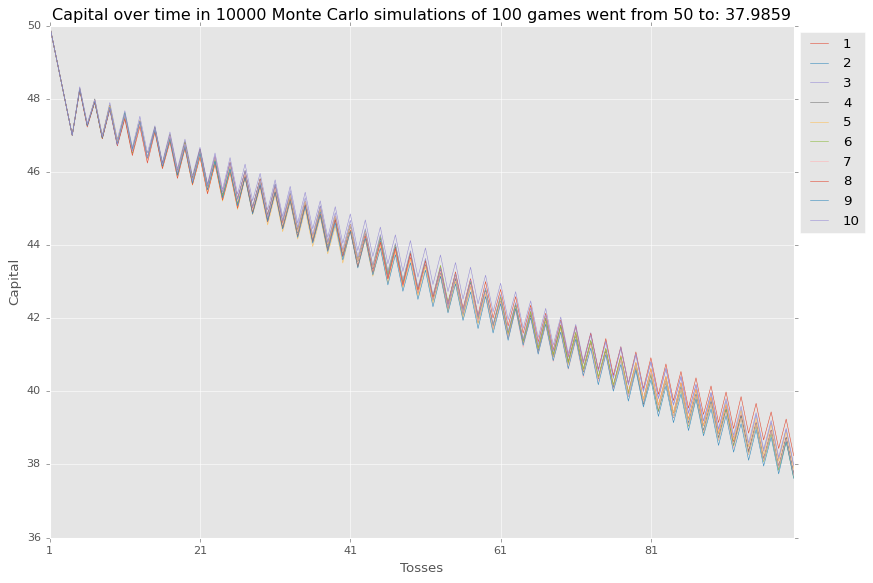

In [574]:
#Expected value of Final Capital.
E_FCapital = np.sum([df1_n_sim[i].iloc[-1].sum() for i in range (10)])/10
print("The Expected Value (µ) is: -", ((50-E_FCapital)/50)*100, "% ($", E_FCapital,"), it is indeed a very bad RoI..")

#Call line_plot function to plot Expected Value for each toss in experiments.
[line_plot(df1_n_sim[i], 'Tosses', 'Capital', 100, 50, df1_n_sim[i].iloc[-1], 10000) for i in range(10)][2]

Simulations expected values $(\mu)$ for each toss seem to approximate enough.<br>
Therefore, we could use just 1 simulation $(n_{sim}=10000)$.

In [575]:
#Probabilities of winning and losing.
WL1=pd.DataFrame((((df1.iloc[:,-1]>50).value_counts())/10000).rename({True: "Wins", False: "Losses"}))
WL1.rename(columns={100: 'F_Capital'}, inplace=True)
WL1

,F_Capital
Losses,0.8084
Wins,0.1916


*Probabilities:*

In [576]:
#Tosses taken to win
unique, counts = np.unique((df1.T.diff()==8).sum(), return_counts=True)
df1_tosses=pd.DataFrame({'Wins': unique, 'frequency': counts}).set_index('Wins')
df1_tosses

,frequency
Wins,
3,19
4,58
5,195
6,426
7,907
8,1377
9,1806
10,1772
11,1524


*Tosses to Win:*

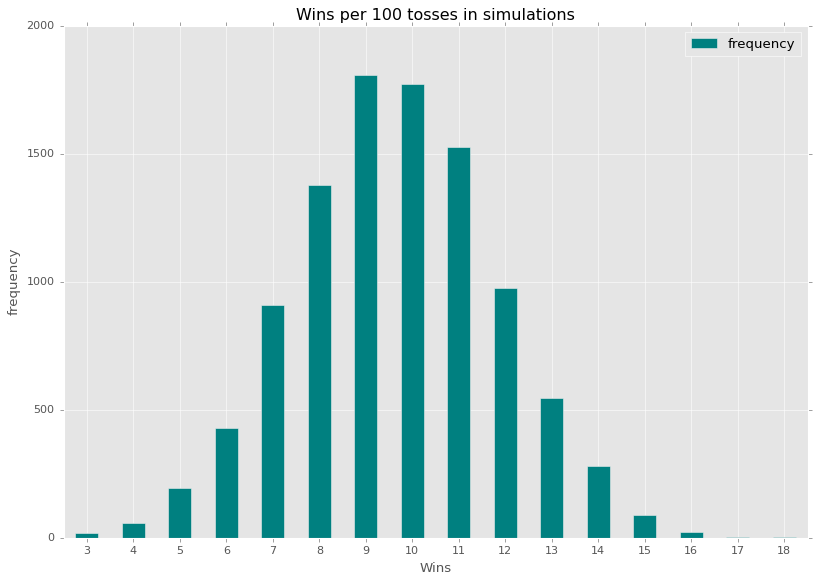

In [577]:
#Bar plot of tosses to win.
df1_tosses.plot.bar(figsize = (12, 8), xlabel = "Wins", ylabel = "frequency",
                     title = "Wins per 100 tosses in simulations", color = 'teal')
plt.xticks(rotation=0)
plt.show()

In [578]:
#Show Mean and Mode in dataframe
print("The average number of winning events per game is:", (df1.T.diff()==8).sum().mean()) 
pd.DataFrame([(df1.T.diff()==8).sum().mean(),(df1.T.diff()==8).sum().mode()[0]], index=['Mean', 'Mode']).rename(columns={0: 'E (V)'}) #Mean and Mode values.

The average number of winning events per game is: 9.6394


,E (V)
Mean,9.6394
Mode,9.0000


In [579]:
#Final Capital of simulations > Initial Capital probability.
WL1=pd.DataFrame((((df1.iloc[:,-1]>50).value_counts())).rename({True: "Wins", False: "Losses"}))
WL1.rename(columns={100: 'Prob.'}, inplace=True)
WL1

,Prob.
Losses,8084
Wins,1916


###### Prob. of tossing >= 10 times?

In [580]:
ten = (pd.DataFrame((df1.T.diff()==8).sum()>=10)) #Winning Events with >=10 tosses for simulations
ten = ten[ten==True].count()[0]/10000 #Prob.
print("The probability that the player wins in 10 tosses or more is:", ten)

The probability that the player wins in 10 tosses or more is: 0.5212


###### Prob. of tossing < 5 times?

In [581]:
five = (pd.DataFrame((df1.T.diff()==8).sum()<=5)) #Winning Events with >=10 tosses for simulations
five = five[five==True].count()[0]/10000 #Prob.
print("The probability that the player losses in 5 tosses or less is:", five)

The probability that the player losses in 5 tosses or less is: 0.0272


#### **Game 2:** *1,000,000 Flips for 100 coin tosses games each with $50 Capital*

As faster processing times are preferred, instead of doing $n_{sim}=10000$ simulations many times or just once for calculations,<br>
we will evaluate if doing many more simulations ($n_{sim}=1000000$), deliver different and therefore more accurate results or not. 

In [582]:
#Simulate 1000000 games of 150 coin tosses each with given variables (see function).
df2 = coin_game_sim(50, 1, 100, 8, 0, 1000000)
df2.index = df2.index + 1
df2.head(8)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Sim,,,,,,,,,,,,,,,,,,,,,
1,50.0,49.0,48.0,47.0,46.0,45.0,53.0,52.0,51.0,50.0,...,32.0,31.0,30.0,29.0,28.0,27.0,35.0,34.0,33.0,32.0
2,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,41.0,40.0,39.0,38.0,46.0,45.0,44.0,43.0,42.0,41.0
3,50.0,49.0,48.0,47.0,55.0,54.0,53.0,52.0,51.0,50.0,...,59.0,58.0,57.0,56.0,55.0,54.0,62.0,61.0,60.0,59.0
4,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,68.0,67.0,75.0,74.0,73.0,72.0,80.0,79.0,78.0,77.0
5,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0,15.0,14.0
6,50.0,49.0,48.0,47.0,46.0,45.0,53.0,52.0,51.0,50.0,...,68.0,67.0,66.0,65.0,64.0,63.0,62.0,61.0,60.0,59.0
7,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0,...,68.0,67.0,66.0,65.0,64.0,63.0,62.0,61.0,69.0,68.0
8,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,41.0,40.0,39.0,38.0,37.0,36.0,35.0,34.0,42.0,41.0


In [583]:
df2.tail(8)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Sim,,,,,,,,,,,,,,,,,,,,,
999993,50.0,49.0,48.0,47.0,55.0,54.0,53.0,52.0,51.0,50.0,...,41.0,40.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0
999994,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,32.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0,24.0,23.0
999995,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,50.0,49.0,57.0,56.0,55.0,54.0,53.0,52.0,60.0,59.0
999996,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,14.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0
999997,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,51.0,50.0
999998,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,68.0,67.0,66.0,65.0,73.0,72.0,71.0,70.0,69.0,68.0
999999,50.0,49.0,48.0,47.0,46.0,45.0,53.0,52.0,51.0,50.0,...,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0,15.0,14.0
1000000,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0,...,14.0,13.0,21.0,20.0,19.0,18.0,17.0,16.0,15.0,14.0


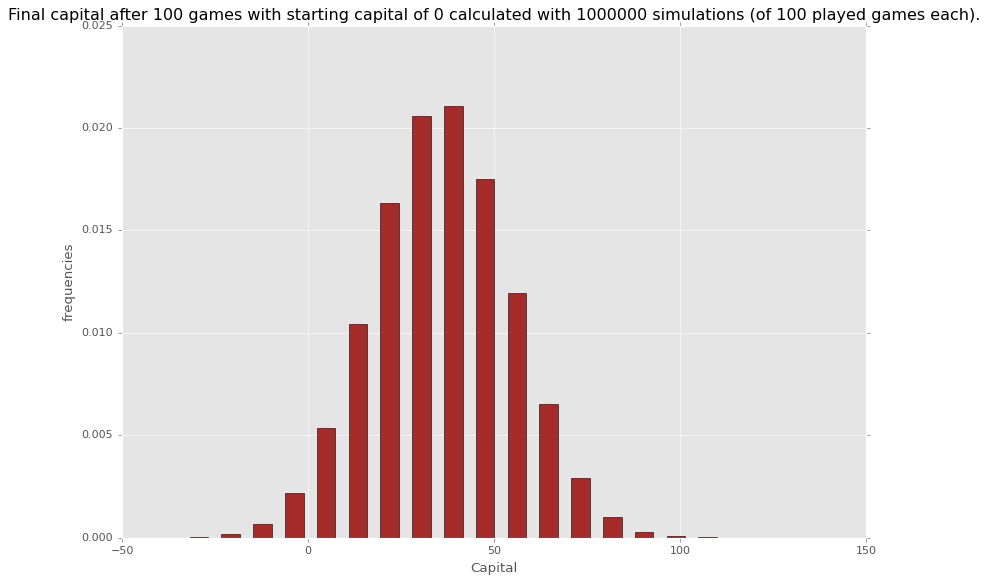

In [584]:
#Call hist_plot function
hist_plot(df2.iloc[:,-1], "Capital" , "frequencies", 100, 1000000, 0, "brown")

In [585]:
#Describe the final capital of the simulations.
desc2 = pd.DataFrame(df2.iloc[:,-1].describe())
desc2.rename(columns={150: 'F_Capital'}, inplace=True)
desc2

,100
count,1000000.000000
mean,37.758695
std,19.442627
min,-49.000000
25%,23.000000
50%,41.000000
75%,50.000000
max,122.000000


*¿What is your Expected Value of $ (Won/Lost)?*

In [586]:
#Mean and Mode of simulations Final Capital.
mean2 = df2.iloc[:,-1].mean()
mode2 = df2.iloc[:,-1].mode()[0]
print("The Expected Value of the capital after", 100, "tosses is: -", mean2)
pd.DataFrame({'Mean': [mean2], 'Mode': [mode2]}).T.rename(columns={0: 'E($) Loss'})

The Expected Value of the capital after 100 tosses is: - 37.758695


,E($) Loss
Mean,37.758695
Mode,41.000000


<br> *¿What is the probability of winning?*

If we remember correctly, just 10000 simulations once delivered the following results: 

In [587]:
WL1

,Prob.
Losses,8084
Wins,1916


If we compare Final_Capital in 1,000,000 simulations, we can conclude 10,000 simulations once are just enough to evaluate Expected Values & Probabilities. 

In [588]:
#Probability that the Final Capital is positive.
WL2=pd.DataFrame((((df2.iloc[:,-1]>50).value_counts())/1000000).rename({True: "Wins", False: "Losses"}))
WL2.rename(columns={100: 'F_Capital'}, inplace=True)
WL2

,F_Capital
Losses,0.80587
Wins,0.19413


##### 2. Dices Game. (5 points)
The dices game requires the player to roll two dice one or more times until a decision is reached as to whether he (or she) wins or loses.<br>
He wins if the first roll results in a sum of 7 or 11 or, alternatively, if the first sum is 4, 5, 6, 8, 9 or 10 and the same sum reappears before a sum of 7 appears.<br>
Conversely, loses if the first roll results in a sum of 2, 3 or 12 or, alternatively, if the first sum is 4, 5, 6, 8, 9 or 10 and a sum of 7 after the first addition it reappears.

In [589]:
def dice_game(initial_cap, bet, prize, n_dice):
    """Simulates a game of rolling 2 dices, where the player bets on their resulting sum.
    The player wins if the sum is 7, 11 or if re rolling sum reappears for the next throw,
    loses if the sum is 2, 3 or 12 and re rolls if the sum is 4, 5, 6, 8, 9 or 10 until he wins or losses.
    Parameters
    ----------
    initial_cap : int
        The initial capital of the player.
    bet : int
        The amount of money that the player bets on each coin toss.
    prize : int
        The amount of money that the player wins if the event occurs.
    n_dice : int
        The number of times the dice is rolled.
    Returns
    -------
    capital : numpy.ndarray
        The capital of the player after each game played.
    """
    #Creation of 2 random vectors of dices with results from 1 to 6 as integers.
    dice_1 = np.random.randint(1,7,n_dice) 
    dice_2 = np.random.randint(1,7,n_dice) 
    sum = dice_1 + dice_2 
    
    #Vectors of zeros for filling.
    capital = np.zeros(n_dice) 
    
    #Variables at game start.
    capital[0] = initial_cap 
    
    #Working with arrays outside function: nonlocal variable.
    def fill_vector(i):
        nonlocal capital 
        
        #Winning event:
        if sum[i] == 7 or sum[i] == 11:
            capital[i + 1] = capital[i] + prize 
        
        #Losing event:
        elif sum[i] == 2 or sum[i] == 3 or sum[i] == 12:
            capital[i + 1] = capital[i] - bet 

        #Reroll event:
        else:
            #Throw dices again.
            dice_1_r = np.random.randint(1,7,n_dice) 
            dice_2_r = np.random.randint(1,7,n_dice)
            sum_r = dice_1_r + dice_2_r

            #While re roll sum is not equal to last sum or last re roll sum, keep rolling.
            while sum_r[i] != sum[i-1] or sum_r[i] != sum_r[i-1]:
                #Throw dices again:
                dice_1_r = np.random.randint(1,7,n_dice) 
                dice_2_r = np.random.randint(1,7,n_dice)
                sum_r = dice_1_r + dice_2_r
            #Losing event:
            if sum_r[i] == 7:
                capital[i + 1] = capital[i] - bet 
            else:
                #Winning event:
                capital[i + 1] = capital[i] + prize 

    #Fill variables with values.          
    [fill_vector(i) for i in range(n_dice - 1)] 
    return capital

#### **Game 3:** *Simulation of 10,000 Dice Throws with $500 Capital*

1 Simulation $(n_{sim}=10000)$

In [590]:
df3_n_sim = pd.DataFrame(dice_game(500, 3, 1, 10000))
df3_n_sim.head(8)

,0
0,500.0
1,501.0
2,502.0
3,499.0
4,500.0
5,501.0
6,502.0
7,503.0


In [591]:
df3_n_sim.tail(8)

,0
9992,1328.0
9993,1329.0
9994,1330.0
9995,1331.0
9996,1332.0
9997,1333.0
9998,1334.0
9999,1335.0


The Expected Value (µ) is:  0.0167 % per throw. For 10 games, we would expect a Final Capital of 500.835 $.


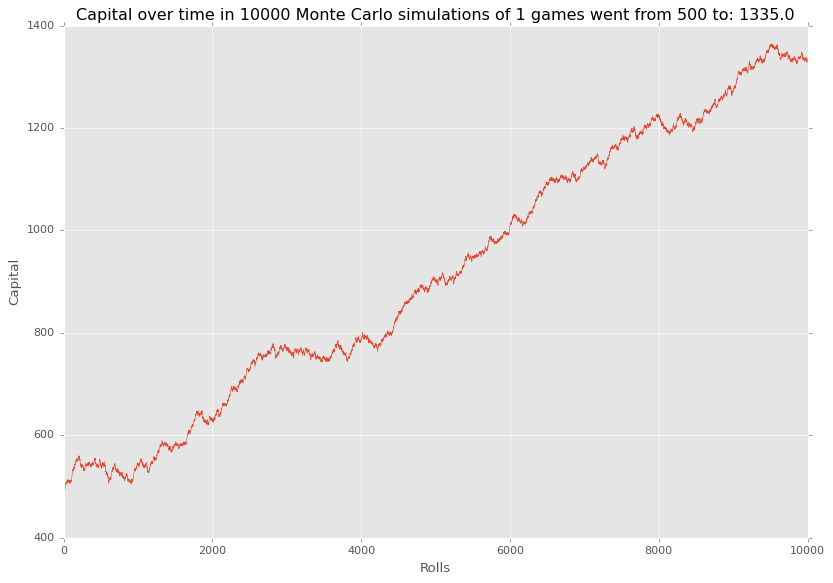

In [592]:
#Expected value of Final Capital.
E_F3Capital = df3_n_sim.iloc[-1][0]
E_Fpct = ((((df3_n_sim.iloc[-1][0]-500)/500)*100)/10000)
print("The Expected Value (µ) is: ", round(E_Fpct,4), "% per throw. For 10 games, we would expect a Final Capital of", (500 + (500*(((df3_n_sim.iloc[-1][0]-500)/500))/10000)*10), "$.")

#Call line_plot function for several simulations E(V) in each toss
line_plot(df3_n_sim, 'Rolls', 'Capital', 1, 500, E_F3Capital, 10000)
plt.legend().set_visible(False)

*Expected Values:*

In [593]:
#Simulate 100 df3_n_sim
df3_10=pd.DataFrame([dice_game(500, 3, 1, 10) for i in range(1000)])
df3_10

,0,1,2,3,4,5,6,7,8,9
0,500.0,501.0,498.0,499.0,500.0,501.0,502.0,499.0,500.0,501.0
1,500.0,501.0,502.0,503.0,500.0,501.0,502.0,503.0,504.0,505.0
2,500.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,501.0
3,500.0,501.0,498.0,499.0,500.0,501.0,502.0,499.0,500.0,501.0
4,500.0,501.0,498.0,499.0,496.0,497.0,498.0,495.0,496.0,497.0
...,...,...,...,...,...,...,...,...,...,...
995,500.0,501.0,502.0,503.0,500.0,501.0,498.0,499.0,500.0,501.0
996,500.0,501.0,498.0,499.0,500.0,497.0,494.0,491.0,492.0,493.0
997,500.0,497.0,498.0,499.0,500.0,501.0,498.0,495.0,496.0,497.0
998,500.0,497.0,498.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0


In [594]:
#Expected value of Final Capital.
E_F3Capital = df3_10.iloc[:,-1].mean()
print("The Expected Value (µ) is: +", ((E_F3Capital-500)/500)*100, "% ($", E_F3Capital,"), not a very decent RoI..")

The Expected Value (µ) is: + 0.22000000000000458 % ($ 501.1 ), not a very decent RoI..


*Probabilities:*

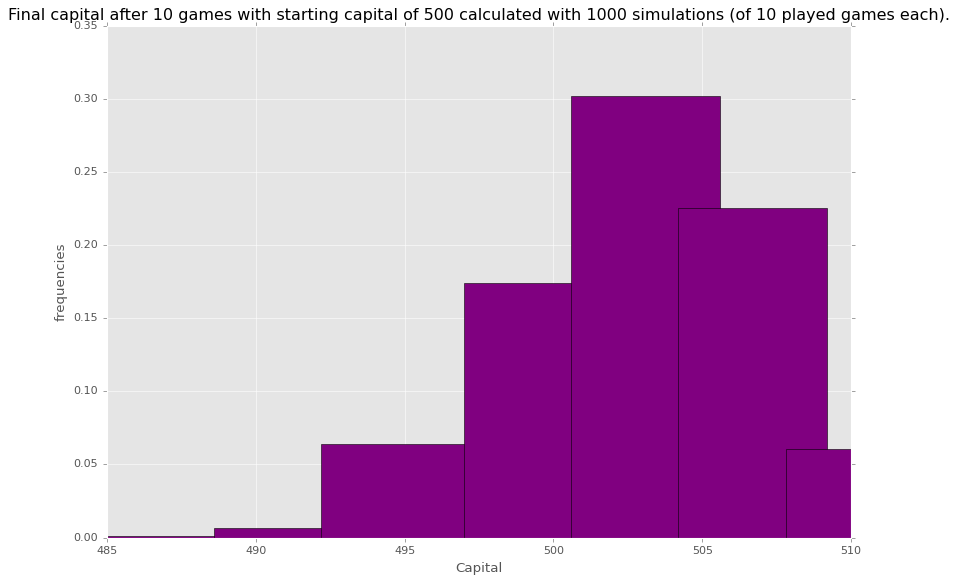

In [595]:
#Make an histogram of the Final Capital after 10 throws.
hist_plot(df3_10.iloc[:,-1], "Capital" , "frequencies", 10, 1000, 500, "purple")

In [596]:
#Final Capital of simulations > Initial Capital probability.
WL3=pd.DataFrame((((df3_10.iloc[:,-1]>500).value_counts())).rename({True: "Wins", False: "Losses"}))
WL3.rename(columns={9: 'Prob.'}, inplace=True)
WL3

,Prob.
Wins,705
Losses,295


In [597]:
desc3 = pd.DataFrame(df3_10.iloc[:,-1].describe())
desc3.rename(columns={9: 'F_Capital'}, inplace=True)
desc3

,F_Capital
count,1000.000000
mean,501.100000
std,4.322115
min,485.000000
25%,497.000000
50%,501.000000
75%,505.000000
max,509.000000


In [598]:
def diceGame(n):
    """Simulates a dice game and returns the probability of winning, losing, and rerolling events.
    Parameters
    ----------
    n : int
        Number of simulations.  
    Returns
    -------
    plot : histogram
        Histogram of probabilities of winning, losing, and rerolling events.
    """
    dice_1 = np.random.randint(1,7,n)
    dice_2 = np.random.randint(1,7,n)
    s = dice_1+dice_2
    # 7 and 11 are the only two numbers that win
    wins = [len(s[s == wins])/len(s) for wins in [7,11]]
    w=wins[0]+wins[1]
    # 2, 3, and 12 are the only three numbers that lose
    loses = [len(s[s == loses])/len(s) for loses in [2,3,12]]
    l=loses[0]+loses[1]+loses[2]
    # All other numbers are rerolled
    rep = [len(s[s == rep])/len(s) for rep in [4,5,6,8,9,10]]
    rep = np.sum([rep[i] for i in range(len(rep))])
    plt.style.use('ggplot')
    plt.title('Probability of Events in Dice Games')
    plt.bar(['Win', 'Reroll', 'Lose'], [w,rep,l])
    plt.ylabel('Probability')
    return plt.show()

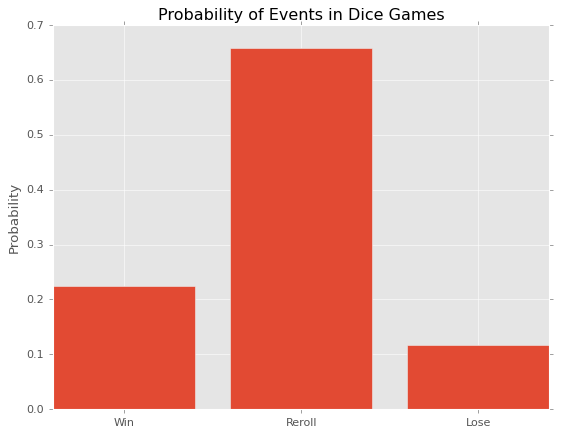

In [599]:
diceGame(10000)

#### 3. Monty Hall (5 points)
You are given the choice of three doors: behind one door is a valuable prize; Behind the other two, goats. You choose a door, let's say the No. 1, and the host, who knows what is behind the doors, opens another door, suppose the No. 3, who has a goat. Then he says to you: "Do you want to choose door No. 2?" Is there an advantage to changing the first door chosen?. Solve this problem using montecarlo and answer the following question:
What would be the probability of winning the valuable prize if you choose to change the first gate chosen?

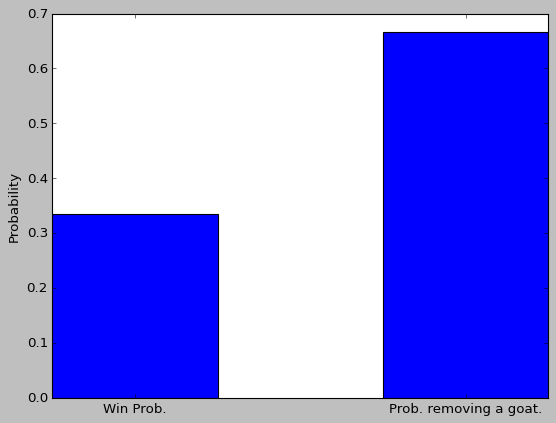

In [600]:
# Simulations
n = 10000

# Initialize 
doors_2 = 0
doors_3 = 0

# Simulation
for i in range(n):
    doors = ['goat', 'prize', 'goat']
    # Change the results
    np.random.shuffle(doors)
    # Random choice
    choice_3 = np.random.randint(0, 2)
    # Removal of door containing a goat
    goat_X = np.random.choice([i for i in range(len(doors)) if doors[i] == 'goat' and i != choice_3])
    doors_remaining = [0, 1, 2]
    doors_remaining.remove(choice_3) # Elimination of choice with 3 doors
    doors_remaining.remove(goat_X) # Goat removal
    choice_2 = doors_remaining[0] # Choice resulting from having 2 doors
    # Count hits with 3 and 2 doors after change of choice.
    if doors[choice_3] == 'prize':
        doors_3 += 1
    elif doors[choice_2] == 'prize':
        doors_2 += 1
        
# Histogram of probabilities
plt.style.use('classic')
plt.bar(['Win Prob.', 'Prob. removing a goat.'],\
        [doors_3 / n, doors_2 / n], width=0.5)
plt.ylabel('Probability')
plt.show()

In [601]:
print('The probability of opening the door containing the prize is:', doors_3 / n,
      '. If a door is removed by containing a goat, the new. chance of winning is:', doors_2 / n)

The probability of opening the door containing the prize is: 0.3339 . If a door is removed by containing a goat, the new. chance of winning is: 0.6661


#### 4. Triangles Game (5 points)
Three uniformly random points are chosen from the perimeter of a unit circle. <br>
Use Monte Carlo simulation to generate triangles. <br>
¿what is the probability of randomly generating acute triangles?

In [608]:
#Monte Carlo simulation to find the probability that the points form an acute triangle, what is the probability of randomly generating acute triangles?
def triangle(n):
    """Simulates a triangle and returns the probability of being acute.
    Parameters
    ----------
    n : int
        Number of simulations.  
    Returns
    -------
    plot : histogram
        Histogram of probabilities of being acute.
    """

    acute = 0
    for i in range(n):
        x = np.random.randint(1, 100, 3)
        y = np.random.randint(1, 100, 3)
        a = np.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2)
        b = np.sqrt((x[2] - x[1])**2 + (y[2] - y[1])**2)
        c = np.sqrt((x[2] - x[0])**2 + (y[2] - y[0])**2)
        if a**2 + b**2 > c**2 and a**2 + c**2 > b**2 and b**2 + c**2 > a**2:
            acute += 1

    return print("The probability of forming an acute triangle is:", acute / n)

triangle(10000)

The probability of forming an acute triangle is: 0.2814
